Рассмотрим основные моменты не вошедшие в предыдущие лекции

In [49]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Импортируем датасет MNIST.

In [50]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()
print('')

Объем тренировочного набора данных:

In [51]:

X_train = X_train[:3000]
y_train = y_train[:3000]
len(X_train)

3000

Посмотрим, что из себя представляет, например, нулевой объект.

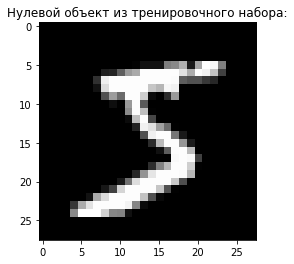

In [52]:
plt.title("Нулевой объект из тренировочного набора:")
plt.imshow(X_train[0], cmap="gray")

Отклик нулевого объекта из тренировочного набора:

In [53]:
y_train[0]

5

Для начала преобразуем данные в привычный формат.

In [54]:
dim = 784 # 28*28 
X_train = X_train.reshape(len(X_train), dim)

Уменьшим размерность тестовых данных, выбрав 56 главных компонент

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=40, svd_solver='full')
# pca_model = pca.fit(X_train)
#  X_train_normalized = pca_model.transform(X_train) 

Найдем долю объясненной дисперсии в зависимости от количества используемых ГК.

In [56]:
# explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
# explained_variance

Для разделения данных рекомендуем использовать функцию train_test_split из библиотеки sklearn. Следующий код разделяет исходные данные в отношении 70/30.

In [57]:
from sklearn.model_selection import train_test_split

X_train_normalized, X_test_normalized, y_train, y_test = train_test_split(X_train, 
                                                                          y_train, 
                                                                          test_size=.3, 
                                                                          random_state=30)


Выведем выборочное среднее нулевой колонки для полученного тренировочного набора

In [58]:
import pandas as pd
# pd.DataFrame(X_train_normalized)[0].mean()
pd.DataFrame(X_train)
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## Алгоритм случайного леса RandomForestClassifier

Подключаем библиотеку для оценки

In [59]:
from sklearn.metrics import confusion_matrix

Подключаем библиотеку для обучения многоклассового классификатора методом One-vs-All и алгоритм случайного леса

In [60]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

Обучаем модель:

In [61]:
forest = RandomForestClassifier(criterion='gini', 
                              min_samples_leaf=10, 
                              max_depth=20, 
                              n_estimators=10, 
                              random_state=30)
clf_forest = OneVsRestClassifier(forest).fit(X_train_normalized, y_train)

y_pred = clf_forest.predict(X_test_normalized)
print('')

Выполняем оценку:

In [62]:
CM = confusion_matrix(y_test, y_pred)
CM

array([[ 88,   0,   0,   0,   0,   1,   0,   0,   1,   0],
       [  0, 107,   1,   2,   0,   0,   1,   0,   1,   0],
       [  1,   1,  73,   3,   1,   0,   2,   0,   1,   1],
       [  0,   2,   2,  78,   0,   2,   0,   2,   1,   0],
       [  4,   0,   1,   0,  83,   0,   1,   2,   0,   9],
       [  0,   0,   0,   4,   2,  59,   4,   0,   5,   3],
       [  1,   0,   1,   0,   3,   2,  86,   0,   0,   0],
       [  1,   2,   2,   1,   1,   0,   0,  89,   0,   5],
       [  1,   2,   1,   6,   1,   1,   2,   1,  60,   4],
       [  0,   0,   2,   0,   4,   0,   1,   4,   0,  67]], dtype=int64)

Число верно классифицирвоанных объектов класс 4

In [63]:
result = 0
for i in range(0, len(CM[0])):
    result += CM[i][i]

#CM[4][4]
result

790

## Алгоритм логистической регрессии LogisticRegression

Подключаем библиотеку логистической регрессии

In [64]:
from sklearn.linear_model import LogisticRegression

Обучаем модель

In [65]:
logReg = LogisticRegression(solver='lbfgs', 
                          random_state=95)
clf_logReg = OneVsRestClassifier(logReg).fit(X_train_normalized, y_train)

y_pred = clf_logReg.predict(X_test_normalized)
print('')

c:\users\zalma\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\zalma\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

c:\users\zalma\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Выполняем оценку:

In [66]:
CM = confusion_matrix(y_test, y_pred)
CM

array([[ 87,   0,   0,   0,   1,   2,   0,   0,   0,   0],
       [  0, 108,   1,   0,   0,   0,   0,   0,   3,   0],
       [  2,   1,  67,   5,   2,   1,   0,   2,   1,   2],
       [  2,   1,   1,  73,   1,   4,   0,   3,   1,   1],
       [  1,   0,   2,   2,  82,   0,   2,   2,   1,   8],
       [  2,   0,   0,   7,   3,  53,   3,   0,   4,   5],
       [  0,   0,   5,   0,   4,   1,  82,   0,   1,   0],
       [  1,   2,   2,   0,   1,   0,   0,  86,   1,   8],
       [  1,   3,   4,   3,   0,   5,   2,   2,  57,   2],
       [  1,   0,   2,   1,   5,   0,   0,   6,   0,  63]], dtype=int64)

Число верно классифицирвоанных объектов класс 6

In [19]:
result = 0
for i in range(0, len(CM[0])):
    result += CM[i][i]

#CM[4][4]
result


NameError: name 'CM' is not defined

## Дерево принятия решений

Подключаем библиотеку логистической регрессии

In [67]:
from sklearn.tree import DecisionTreeClassifier

Обучаем модель

In [68]:
tree = DecisionTreeClassifier(criterion='gini',
                          min_samples_leaf=10,
                          max_depth=20,
                          random_state=30)
clf_tree = OneVsRestClassifier(tree).fit(X_train_normalized, y_train)

y_pred = clf_tree.predict(X_test_normalized)
print('')

Выполняем оценку:

In [69]:
CM = confusion_matrix(y_test, y_pred)
CM

array([[ 77,   0,   1,   3,   0,   0,   2,   0,   0,   7],
       [  1, 100,   2,   0,   1,   0,   3,   0,   2,   3],
       [  1,   1,  63,   2,   4,   0,   3,   0,   5,   4],
       [  1,   0,   6,  63,   2,   5,   0,   4,   2,   4],
       [  0,   1,   2,   2,  70,   1,   2,   2,   2,  18],
       [  2,   0,   1,   3,   1,  56,   1,   1,   2,  10],
       [  2,   1,   4,   1,   2,   0,  75,   0,   3,   5],
       [  0,   4,   3,   0,   5,   1,   0,  80,   1,   7],
       [  2,   2,   4,   4,   2,   3,   3,   2,  50,   7],
       [  1,   0,   2,   2,   5,   0,   0,   6,   0,  62]], dtype=int64)

Число верно классифицирвоанных объектов класс 7

In [70]:
result = 0
for i in range(0, len(CM[0])):
    result += CM[i][i]

#CM[4][4]
result

696

## Оценка точности предсказания

In [73]:
Data = np.genfromtxt('DataForPrediction_FinalTask.csv', delimiter=',')
pca = PCA(n_components=40, svd_solver='full')
# Data = pca_model.transform(Data)
# clf = clf_tree
clf = clf_forest
# clf = clf_logReg
predict = clf.predict([Data[73]])
predict[0]

7

Получение вероятности

In [74]:
clf.predict_proba([Data[73]])


array([[0.04080543, 0.        , 0.        , 0.23031664, 0.00544072,
        0.        , 0.0120905 , 0.4073077 , 0.14712161, 0.15691739]])